In [1]:
import random
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special 
import scipy.integrate as integrate

In [2]:
@jit
def func():
    
    N=400 #Number of particles
    M=100000 #Number of samples

    V = [] #A list where I save my random orientations
    I1 = [] #An intermediate list where I save the cosines of the orientations
    I2 = []
    I3 = []
    Q1list = []
    Q2list = []
    Q3list = []
    Qlist = []

    for j in range(M):    
        for i in range(N):
            phi = random.random()
            theta = random.random()
            
            I1.append(np.cos(2*np.pi*phi)*np.sin(2*np.pi*theta)) 
            I2.append(np.sin(2*np.pi*phi)*np.sin(2*np.pi*theta)) 
            I3.append(np.cos(2*np.pi*theta))

        
        Q1 = (1/N)*sum(I1) 
        Q1list.append(Q1)
        
        Q2 = (1/N)*sum(I2) 
        Q2list.append(Q2)
        
        Q3 = (1/N)*sum(I3) 
        Q3list.append(Q3)

        Q = np.sqrt(Q1*Q1 + Q2*Q2 + Q3*Q3) 
        Qlist.append(Q)

        I1.clear()
        I2.clear()
        I3.clear()
        
    return Qlist

In [3]:
Qlist = func()

In [4]:
gamma = np.arange(0, 50, 0.0001)

Q = np.cosh(gamma)/np.sinh(gamma) - 1/gamma

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


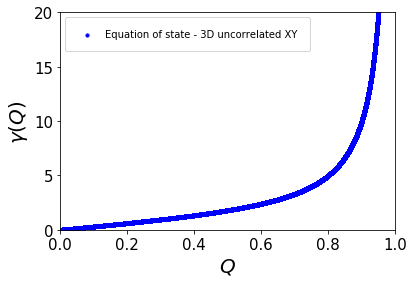

In [5]:
#plt.scatter(gamma, Q, label=r'$Q(\gamma)$', color='red', s=10, marker='o')
plt.scatter(Q, gamma, label='Equation of state - 3D uncorrelated XY', color='blue', s=10, marker='o')

plt.xlim(0,1)
plt.ylim(0,20)

plt.xlabel(r'$ Q $', fontsize='20')
plt.ylabel(r'$  \gamma(Q) $', fontsize='20')
plt.tick_params(labelsize=15)
plt.legend(borderpad=1.2, labelspacing=1.2)
plt.show()

In [6]:
N = 400
I = []
r = len(Q)
temp = 0.0
for i in range(1, r-1): #Can't have i=0 because Q(x) = (exp(x) + exp(-x)) / (exp(x) - exp(-x)) - 1/x
    temp += (gamma[i] + gamma[i+1])*(Q[i+1] - Q[i])/2
    I.append(temp)

r2 = r - 2 # Correct for the nan values of the Q vector
Qprime = Q[-r2:] # Remove the nan values
#print(len(Q))
#print(Qprime)
Inew = N*np.negative(I)
Pvec = np.exp(Inew)
Pmod = 4*np.pi*Qprime*Qprime*Pvec

C = np.trapz(Pmod, Qprime)
#print(C)
Pnorm = (1/C) * Pmod

In [7]:
# Exact answer 

N = 400
exact=[]
clt = []

ran = np.arange(0,1,0.0001)

for i in (ran):
    def pexact(x):
        return (2/np.pi)*(x*i)*np.sin(x*i)* ((N/x)*np.sin(x/N))**N 
    
    a = integrate.quad(lambda x: pexact(x), 0, +1000, full_output=1)[0]
    exact.append(a)    
    
# Clt from exact answer    

for i in (ran):
    def pclt(x):
        return (2/np.pi)*(x*i)*np.sin(x*i)* np.exp(-(x*x)/(6*N))
    
    b = integrate.quad(lambda x: pclt(x), 0, +1000, full_output=1)[0]
    clt.append(b) 

In [8]:
# Clt from Large deviation theory

def cltldt(x):
    return ((3*N/(2*np.pi))**(3/2))*4*np.pi*x*x*np.exp(-(3*N*x*x)/(2))

In [24]:
# Large gamma probability density

def largeldt(x):
    return 4*np.pi*x*x*((1-x)**N)
norm = integrate.quad(lambda x: largeldt(x), 0, +0.5, full_output=1)[0]
def normlargeldt(x):
    return (1/norm)*4*np.pi*x*x*((1-x)**N)


def pade(x):
    return 4*np.pi*x*x*np.exp(-N*(3*x - np.log(1-x) - 8*np.log(x+2) + 8*np.log(2)))
padenorm = integrate.quad(lambda x: pade(x), 0, +0.5, full_output=1)[0]
def npade(x):
    return (1/padenorm)*pade(x)

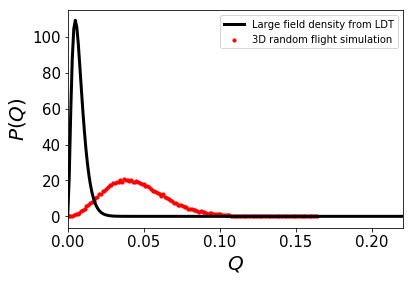

In [25]:
Rho, bins, patches = plt.hist(Qlist, bins=140, align="left", density=True) 
plt.clf()
step = (bins[140] - bins[0])/140
t = np.arange(bins[0], bins[140], step)

#UPro = []
#for i in range(k-1): # Unnormalized Probability distribution array has size k-1
#    temp = (1/ (2*np.pi*t[i]) ) * Rho[i]
#    UPro.append(temp)
    
#tprime = t[:-1]
#simp = integrate.simps(UPro,Qprime) # Gives same answer as my algorithm
#NPro = UPro/letsee
#ExactRate = -(1/N)*np.log(NPro)

ran = np.arange(0,1,0.001)
#plt.plot(ran, exact, color='green', lw=3, label='Exact solution')
#plt.plot(ran, clt, color='black', lw=3, label='Central limit theorem from exact answer')
#plt.plot(ran, cltldt(ran), color='black', lw=3, label='Central limit theorem from LDT')
plt.plot(ran, normlargeldt(ran), color='black', lw=3, label='Large field density from LDT')
#plt.plot(ran, npade(ran), color='black', lw=3, label='Pade approximation')
plt.scatter(t, Rho, label='3D random flight simulation', color='red', s=10, marker='o')
#plt.scatter(Qprime, Pnorm, color='blue', s=1, label='Large Deviations Theory')

plt.xlim(0,0.22)
#plt.ylim(0,22)
plt.xlabel(r'$ Q $', fontsize='20')
plt.ylabel(r'$  P(Q) $', fontsize='20')
plt.tick_params(labelsize=15)
plt.legend(loc='upper right')
plt.show()